In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

In [2]:
client_id = "2200a9f0670244d8858a59856d5d63ac"
client_secret = "851f01c730f44ad7b7ea23d8175f4acf"
username = "sycyska"
redirect_uri = "https://developer.spotify.com/dashboard/applications/2200a9f0670244d8858a59856d5d63ac"

In [3]:
scope = 'user-library-read playlist-modify-public playlist-read-private'

client_credentials_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

token = util.prompt_for_user_token(username,scope,client_id,client_secret,redirect_uri)

if token:
  sp = spotipy.Spotify(auth=token)
  
else:
  print("Can't get token for", username)

In [14]:
import pandas as pd
import numpy as np
#https://open.spotify.com/playlist/2fF0cf0ccA0HXWe8DDHJVG?si=db453a3155554fa1
sourcePlaylistID = '2fF0cf0ccA0HXWe8DDHJVG?si=db453a3155554fa1'
sourcePlaylist = sp.user_playlist(username,sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

In [5]:
#sp.current_user()

In [5]:
track_ids = []
track_names = []

for i in range(0, len(songs)):
  if songs[i]['track']['id']!=None:
    track_ids.append(songs[i]['track']['id'])
    track_names.append(songs[i]['track']['name'])
    
features = []

for i in range(0,len(track_ids)):
  audio_features  = sp.audio_features(track_ids[i])
  for track in audio_features:
    features.append(track)
    
    
playlist_df = pd.DataFrame(features,index = track_names)

In [7]:
track_names

['Piano Quintet No. 1: II. Presto',
 'String Quartet No. 15 in E-Flat Minor, Op. 144: 1. Elegy. Adagio',
 'String Quartet No. 8 in C Minor, Op. 110: 2. Allegro molto',
 'String Quartet No. 8 in C Minor, Op. 110: 3. Allegretto',
 'String Quartet No. 8 in C Minor, Op. 110: 4. Largo',
 'Concerto for Harpsichord and Orchestra: Movement I',
 'String Quartet No. 2',
 'Concerto For Violin and Orchestra No. 1, Op. 35: I. Vivace assai (Konzert für Violine und Orchester Nr. 1/Concerto pour violon et orchestre n° 1)',
 'Violin Concerto No. 1 in D Major, Op. 6, MS 21: I. Allegro maestoso',
 '16 Waltzes, Op. 39: No. 13 In B Major',
 'Concerto No. 2 in G minor, RV 578: II. Larghetto',
 'Concerto No. 6 in A Minor, RV 356: I. Allegro',
 'Concerto No. 6 in A Minor, RV 356: II. Largo',
 'Concerto No. 8 in A Minor, RV 522: I. Allegro',
 'Concerto No. 8 in A Minor, RV 522: II. Larghetto e spiritoso',
 'Concerto No. 8 in A Minor, RV 522: III. Allegro',
 'Debussy: Violin Sonata in G Minor, CD 148, L. 140: I

In [6]:
playlist_df = playlist_df[["id", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]

In [12]:
playlist_df

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
Piano Quintet No. 1: II. Presto,6qvsNxOFlrNgzCvFiSz8cd,0.970,0.442,254547,0.28000,0.63200,7,0.2000,-19.767,1,0.0376,127.478,0.3340
"String Quartet No. 15 in E-Flat Minor, Op. 144: 1. Elegy. Adagio",5ja6ak3CQU7mrzaLCt2uNA,0.914,0.123,807013,0.00182,0.42500,3,0.1400,-41.130,0,0.0534,75.168,0.0367
"String Quartet No. 8 in C Minor, Op. 110: 2. Allegro molto",3DL7joEwJDh9Enw9IBSnjp,0.966,0.421,173133,0.46000,0.89400,7,0.1050,-13.568,1,0.0375,125.925,0.4350
"String Quartet No. 8 in C Minor, Op. 110: 3. Allegretto",7wFl1P3b12mEYa2NDmR20a,0.974,0.507,275653,0.08040,0.89400,0,0.0704,-22.215,0,0.0409,114.016,0.3280
"String Quartet No. 8 in C Minor, Op. 110: 4. Largo",6BUGs2cMmPI5d9ZVqmcRN2,0.971,0.110,410280,0.00756,0.89700,8,0.1110,-25.559,1,0.0460,85.701,0.0312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Requiem, Op. 89, B. 165: Dies irae",1budlJWsLNALmbA8hnpTNE,0.952,0.242,132040,0.27300,0.00794,10,0.1290,-14.913,0,0.0284,86.222,0.1140
Sonatine transatlantique: III. Charleston,4YmQcacYQpkItrKdifMUKh,0.987,0.484,156000,0.19800,0.84900,3,0.1490,-25.179,1,0.0541,103.706,0.3070
Trois préludes en forme de blues: I. Lento cantabile,6ZwldPfAbqnDy9flpCB25I,0.992,0.382,231000,0.00861,0.92500,5,0.0967,-29.525,1,0.0563,67.698,0.0395
"Prince Igor: Polovtsian Dances (Remastered): No. 17e, Moderato alla breve",3diL1o9iwtHIKtR1qX8dS3,0.951,0.000,78467,0.23500,0.71200,9,0.1430,-17.369,1,0.0000,0.000,0.0000


In [13]:
playlist_df.isna().any()

id                  False
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
valence             False
dtype: bool

In [7]:
playlist_df.drop(['id'], axis = 1, inplace = True)

In [8]:
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, Piano Quintet No. 1: II. Presto to Quartetto Dorico
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      98 non-null     float64
 1   danceability      98 non-null     float64
 2   duration_ms       98 non-null     int64  
 3   energy            98 non-null     float64
 4   instrumentalness  98 non-null     float64
 5   key               98 non-null     int64  
 6   liveness          98 non-null     float64
 7   loudness          98 non-null     float64
 8   mode              98 non-null     int64  
 9   speechiness       98 non-null     float64
 10  tempo             98 non-null     float64
 11  valence           98 non-null     float64
dtypes: float64(9), int64(3)
memory usage: 10.0+ KB


In [16]:
playlist_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
Piano Quintet No. 1: II. Presto,0.970,0.442,254547,0.28000,0.632,7,0.2000,-19.767,1,0.0376,127.478,0.3340
"String Quartet No. 15 in E-Flat Minor, Op. 144: 1. Elegy. Adagio",0.914,0.123,807013,0.00182,0.425,3,0.1400,-41.130,0,0.0534,75.168,0.0367
"String Quartet No. 8 in C Minor, Op. 110: 2. Allegro molto",0.966,0.421,173133,0.46000,0.894,7,0.1050,-13.568,1,0.0375,125.925,0.4350
"String Quartet No. 8 in C Minor, Op. 110: 3. Allegretto",0.974,0.507,275653,0.08040,0.894,0,0.0704,-22.215,0,0.0409,114.016,0.3280
"String Quartet No. 8 in C Minor, Op. 110: 4. Largo",0.971,0.110,410280,0.00756,0.897,8,0.1110,-25.559,1,0.0460,85.701,0.0312


Explanatory data analysis

In [9]:
f64 = playlist_df.select_dtypes(include = 'float64')
i64 = playlist_df.select_dtypes(include = 'int64')

In [98]:
i64_key_mode = i64.drop('duration_ms', axis = 1)

In [99]:
i64_key_mode #7-1 to G Dur

,key,mode
Piano Quintet No. 1: II. Presto,7,1
"String Quartet No. 15 in E-Flat Minor, Op. 144: 1. Elegy. Adagio",3,0
"String Quartet No. 8 in C Minor, Op. 110: 2. Allegro molto",7,1
"String Quartet No. 8 in C Minor, Op. 110: 3. Allegretto",0,0
"String Quartet No. 8 in C Minor, Op. 110: 4. Largo",8,1
...,...,...
"Requiem, Op. 89, B. 165: Dies irae",10,0
Sonatine transatlantique: III. Charleston,3,1
Trois préludes en forme de blues: I. Lento cantabile,5,1
"Prince Igor: Polovtsian Dances (Remastered): No. 17e, Moderato alla breve",9,1


In [100]:
mapping = {0: 'moll', 1: 'dur'}

In [101]:
mapping1 = {0: 'C', 1: 'Cis/Des', 2: 'D', 3: 'Dis/Es', 4: 'E', 5: 'F', 6: 'Fis/Ges', 7: 'G', 8: 'Gis/As', 9: 'A', 10: 'Ais/B', 11: 'H'}

In [102]:
i64_key_mode['mode'] = i64_key_mode['mode'].map(mapping)

In [103]:
i64_key_mode['key'] = i64_key_mode['key'].map(mapping1)

In [104]:
i64_key_mode

,key,mode
Piano Quintet No. 1: II. Presto,G,dur
"String Quartet No. 15 in E-Flat Minor, Op. 144: 1. Elegy. Adagio",Dis/Es,moll
"String Quartet No. 8 in C Minor, Op. 110: 2. Allegro molto",G,dur
"String Quartet No. 8 in C Minor, Op. 110: 3. Allegretto",C,moll
"String Quartet No. 8 in C Minor, Op. 110: 4. Largo",Gis/As,dur
...,...,...
"Requiem, Op. 89, B. 165: Dies irae",Ais/B,moll
Sonatine transatlantique: III. Charleston,Dis/Es,dur
Trois préludes en forme de blues: I. Lento cantabile,F,dur
"Prince Igor: Polovtsian Dances (Remastered): No. 17e, Moderato alla breve",A,dur


In [107]:
i64_key_mode['Key/Mode'] = i64_key_mode.apply(lambda row: row['key'] + ' ' + row['mode'], axis=1)

In [113]:
key_mode = i64_key_mode['Key/Mode']

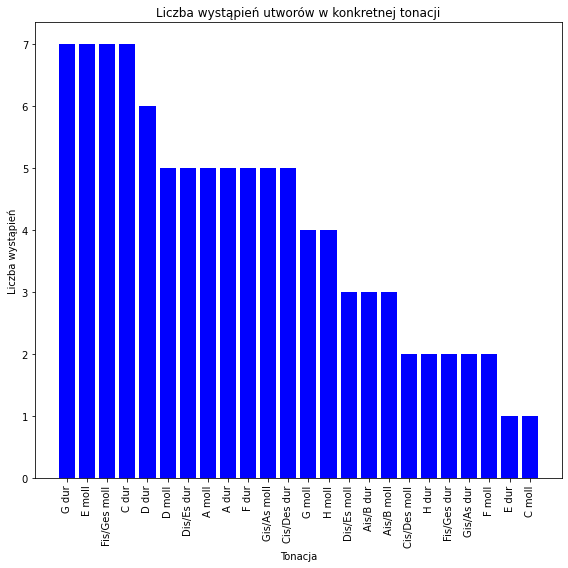

In [129]:
category_counts = i64_key_mode['Key/Mode'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 8)) 
plt.bar(category_counts.index, category_counts, color = 'blue')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add axis labels and title

plt.xlabel('Tonacja')
plt.ylabel('Liczba wystąpień')
plt.title('Liczba wystąpień utworów w konkretnej tonacji')

# Adjust layout
plt.tight_layout()

# Display the chart
plt.savefig('rozklad_tonacji.png', facecolor='white')
plt.show()

In [8]:
f64.describe().applymap(lambda x: f"{x:0.2f}")

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00
mean,0.94,0.31,0.16,0.61,0.17,-21.06,0.05,103.81,0.21
std,0.07,0.14,0.13,0.35,0.15,5.42,0.04,29.22,0.22
min,0.64,0.00,0.00,0.00,0.05,-41.13,0.00,0.00,0.00
25%,0.92,0.23,0.05,0.32,0.09,-24.39,0.04,81.60,0.06
50%,0.96,0.31,0.14,0.81,0.11,-20.49,0.04,101.11,0.13
75%,0.98,0.42,0.23,0.89,0.16,-17.22,0.05,124.47,0.28
max,0.99,0.63,0.66,0.97,0.76,-7.81,0.35,176.40,0.98


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
pd.crosstab(index=i64['key'], columns = "liczba wystąpień") #i64['key'].value_counts()

col_0,liczba wystąpień
key,
0,8
1,7
2,11
3,8
4,8
5,7
6,9
7,11
8,7


In [49]:
nazwy = ['C', 'Cis/Des', 'D', 'Dis/Es', 'E', 'F', 'Fis/Ges', 'G', 'Gis/As', 'A', 'Ais/B', 'H'] #wartości dla 'key'

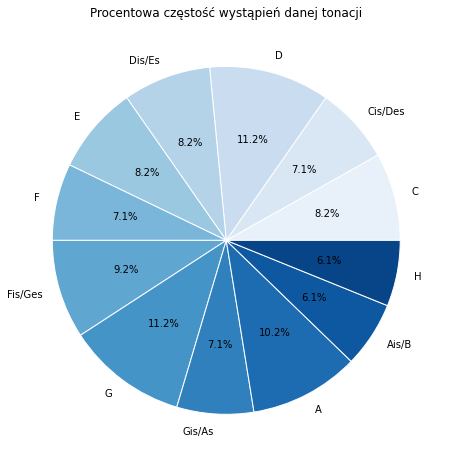

In [66]:
# Tworzenie tabeli przestawnej (crosstab)
frequency = pd.crosstab(index=i64['key'], columns="liczba wystąpień")
frequency.index = nazwy #podmiana liczb z kolumny na nazwy tonacji

percentage = frequency / frequency.sum() * 100

sns.set_palette('Blues', len(percentage)) #'husl'
# Tworzenie wykresu kołowego
plt.figure(figsize=(8, 8)) 
plt.pie(percentage['liczba wystąpień'], labels=percentage.index, autopct='%1.1f%%', wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}) #
plt.title("Procentowa częstość wystąpień danej tonacji")
#plt.axis('equal')  # Zapewnienie, że wykres będzie okrągły
plt.savefig('tonacja.png', facecolor='white')
plt.show()

In [52]:
frequency

col_0,liczba wystąpień
C,8
Cis/Des,7
D,11
Dis/Es,8
E,8
F,7
Fis/Ges,9
G,11
Gis/As,7
A,10


In [20]:
pd.crosstab(index=i64['mode'], columns = "liczba wystąpień")

col_0,liczba wystąpień
mode,
0,48
1,50


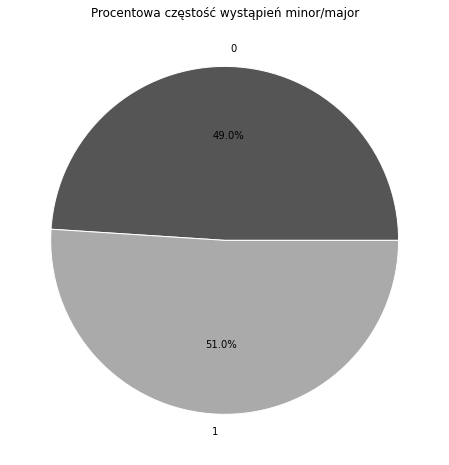

In [69]:
# Tworzenie tabeli przestawnej (crosstab)
mode = pd.crosstab(index=i64['mode'], columns = "liczba wystąpień")
#frequency.index = nazwy #podmiana liczb z kolumny na nazwy tonacji

percentage = mode / mode.sum() * 100

sns.set_palette('gray', len(percentage)) #'husl'
# Tworzenie wykresu kołowego
plt.figure(figsize=(8, 8)) 
plt.pie(percentage['liczba wystąpień'], labels=percentage.index, autopct='%1.1f%%', wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}) #
plt.title("Procentowa częstość wystąpień minor/major")
#plt.axis('equal')  # Zapewnienie, że wykres będzie okrągły
plt.savefig('minormajor.png', facecolor='white')
plt.show()#0 to moll, 1 to dur

In [21]:
playlist_df.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
acousticness,1.000000,0.013471,-0.087032,-0.383498,0.194483,0.021308,-0.221630,-0.208271,-0.013260,0.051136,-0.000686,0.042635
danceability,0.013471,1.000000,-0.372867,0.280886,-0.130203,-0.082889,0.067526,0.251462,0.067544,0.192350,0.419420,0.683873
duration_ms,-0.087032,-0.372867,1.000000,-0.144035,0.008034,-0.031903,-0.037862,-0.083645,-0.041062,-0.083075,-0.065169,-0.374837
energy,-0.383498,0.280886,-0.144035,1.000000,0.103461,0.279880,0.411981,0.678588,0.181134,0.003067,0.119042,0.293163
instrumentalness,0.194483,-0.130203,0.008034,0.103461,1.000000,0.063951,0.127495,-0.067527,0.113062,-0.184623,-0.114552,-0.178387
key,0.021308,-0.082889,-0.031903,0.279880,0.063951,1.000000,0.251267,0.278675,-0.195589,-0.073137,0.002754,0.040403
liveness,-0.221630,0.067526,-0.037862,0.411981,0.127495,0.251267,1.000000,0.158601,0.114195,0.041627,0.083689,0.146161
loudness,-0.208271,0.251462,-0.083645,0.678588,-0.067527,0.278675,0.158601,1.000000,-0.002831,-0.030135,0.111733,0.164557
mode,-0.013260,0.067544,-0.041062,0.181134,0.113062,-0.195589,0.114195,-0.002831,1.000000,-0.048730,-0.085879,0.037429
speechiness,0.051136,0.192350,-0.083075,0.003067,-0.184623,-0.073137,0.041627,-0.030135,-0.048730,1.000000,0.169021,0.296628


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

KORELACJA DLA ATRYBUTÓW Z WARTOŚCIAMI FLOAT 64

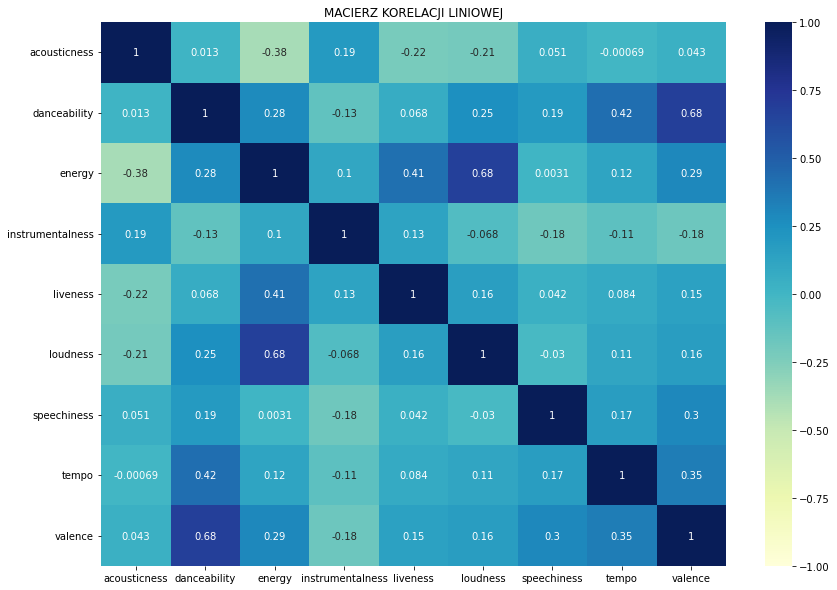

In [21]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(f64.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('MACIERZ KORELACJI LINIOWEJ')

plt.savefig('macierz_korelacji_liniowej.png', facecolor='white', bbox_inches='tight')
plt.show()

In [15]:
np.corrcoef(f64) #the correlation coefficients between all pairs of rows

array([[1.        , 0.94914094, 0.99901962, ..., 0.97084787, 0.25909791,
        0.99904002],
       [0.94914094, 1.        , 0.93429468, ..., 0.99690314, 0.5496872 ,
        0.96198693],
       [0.99901962, 0.93429468, 1.        , ..., 0.95931823, 0.21628012,
        0.99613282],
       ...,
       [0.97084787, 0.99690314, 0.95931823, ..., 1.        , 0.48292516,
        0.98040217],
       [0.25909791, 0.5496872 , 0.21628012, ..., 0.48292516, 1.        ,
        0.30111121],
       [0.99904002, 0.96198693, 0.99613282, ..., 0.98040217, 0.30111121,
        1.        ]])

In [22]:
from scipy.stats import pearsonr

p-values dla współczynnika korelacji Pearsona pomiędzy wszystkimi kolumnami w dataframe f64
https://www.statology.org/p-value-correlation-pandas/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [74]:
def r_pvalues(df):
    cols = pd.DataFrame(columns=df.columns)
    p = cols.transpose().join(cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return p

#use custom function to calculate p-values
r_pvalues(f64)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
acousticness,0.0,0.8953,0.0001,0.055,0.0283,0.0396,0.617,0.9946,0.6768
danceability,0.8953,0.0,0.0051,0.2013,0.5088,0.0125,0.0578,0.0,0.0
energy,0.0001,0.0051,0.0,0.3107,0.0,0.0,0.9761,0.243,0.0034
instrumentalness,0.055,0.2013,0.3107,0.0,0.2109,0.5088,0.0688,0.2614,0.0788
liveness,0.0283,0.5088,0.0,0.2109,0.0,0.1188,0.684,0.4126,0.151
loudness,0.0396,0.0125,0.0,0.5088,0.1188,0.0,0.7683,0.2734,0.1054
speechiness,0.617,0.0578,0.9761,0.0688,0.684,0.7683,0.0,0.0962,0.003
tempo,0.9946,0.0,0.243,0.2614,0.4126,0.2734,0.0962,0.0,0.0004
valence,0.6768,0.0,0.0034,0.0788,0.151,0.1054,0.003,0.0004,0.0


In [ ]:
#wartość p korelacji między 'danceability' a 'valence' to 1e-14
#wartość p korelacji między 'loudness' a 'energy' to 2e-14
#wartość p korelacji między 'danceability' a 'tempo' to 0,00002

In [68]:
#p_values = r_pvalues(f64)
#p_value = p_values["danceability"]["valence"] #wartość p korelacji między 'danceability' a 'valence' to 1e-14
#p_value

p-value below alfa indicates strong evidence against the null hypothesis.
p < 0,05 => istnieje podstawa do odrzucenia hipotezy zerowej
H0: badane zmienne są nieskorelowane

In [132]:
# plt.figure(dpi=200)
# sns.scatterplot(x='danceability',y='valence',data=f64,hue=track_names)
# plt.legend(loc=(1.05,0.2))

In [133]:
# cm = tracks.drop(['key','mode','explicit'], axis=1).corr(method = 'pearson')
# plt.figure(figsize=(14,6))
# map = sns.heatmap(cm, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
# map.set_title('Correlation Heatmap between Variable')
# map.set_xticklabels(map.get_xticklabels(), rotation=90)

In [134]:
# import seaborn as sns

# sns.heatmap(data[feature_names].corr(), annot=True, fmt=".2f", square=True, linewidth=.5)

In [34]:
playlist_df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

In [56]:
columns_modified = playlist_df.drop(['mode'], axis=1)
#columns_modified

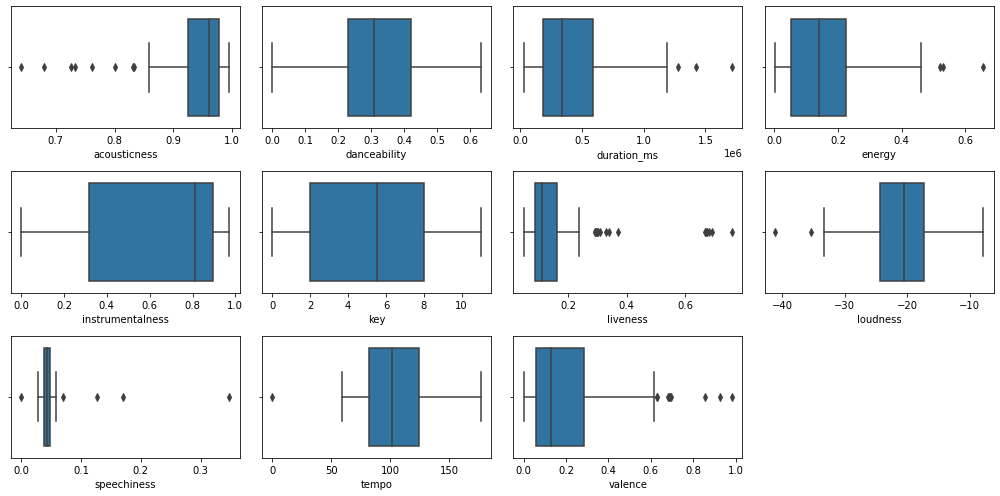

In [73]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(14,7))

for i, ax in enumerate(axs.flatten()):
    if i < len(columns_modified.columns):
        sns.boxplot(x=columns_modified.columns[i], data=columns_modified, ax=ax)
    else:
        ax.axis('off')

plt.tight_layout()
plt.savefig('attributes_boxplots.png', facecolor='white')
plt.show()


Let's now take a look at the boxplot chart. This is an effective graphical method to study statistical description of the dataset in terms of:

    min value
    25% quantile
    50% quantile (median value)
    75% quantile
    max value

The boxplot does highlight the presence of some outliers. We could decide to filter them out, for instance:

    we could remove the top values in the case of duration, energy, liveness, speechiness, valence
    we could remove the bottom values in the case of acoussiticness, speechiness, tempo

However, it must also be considered that the outliers are not completely useless information, so we must be careful when modifying them.

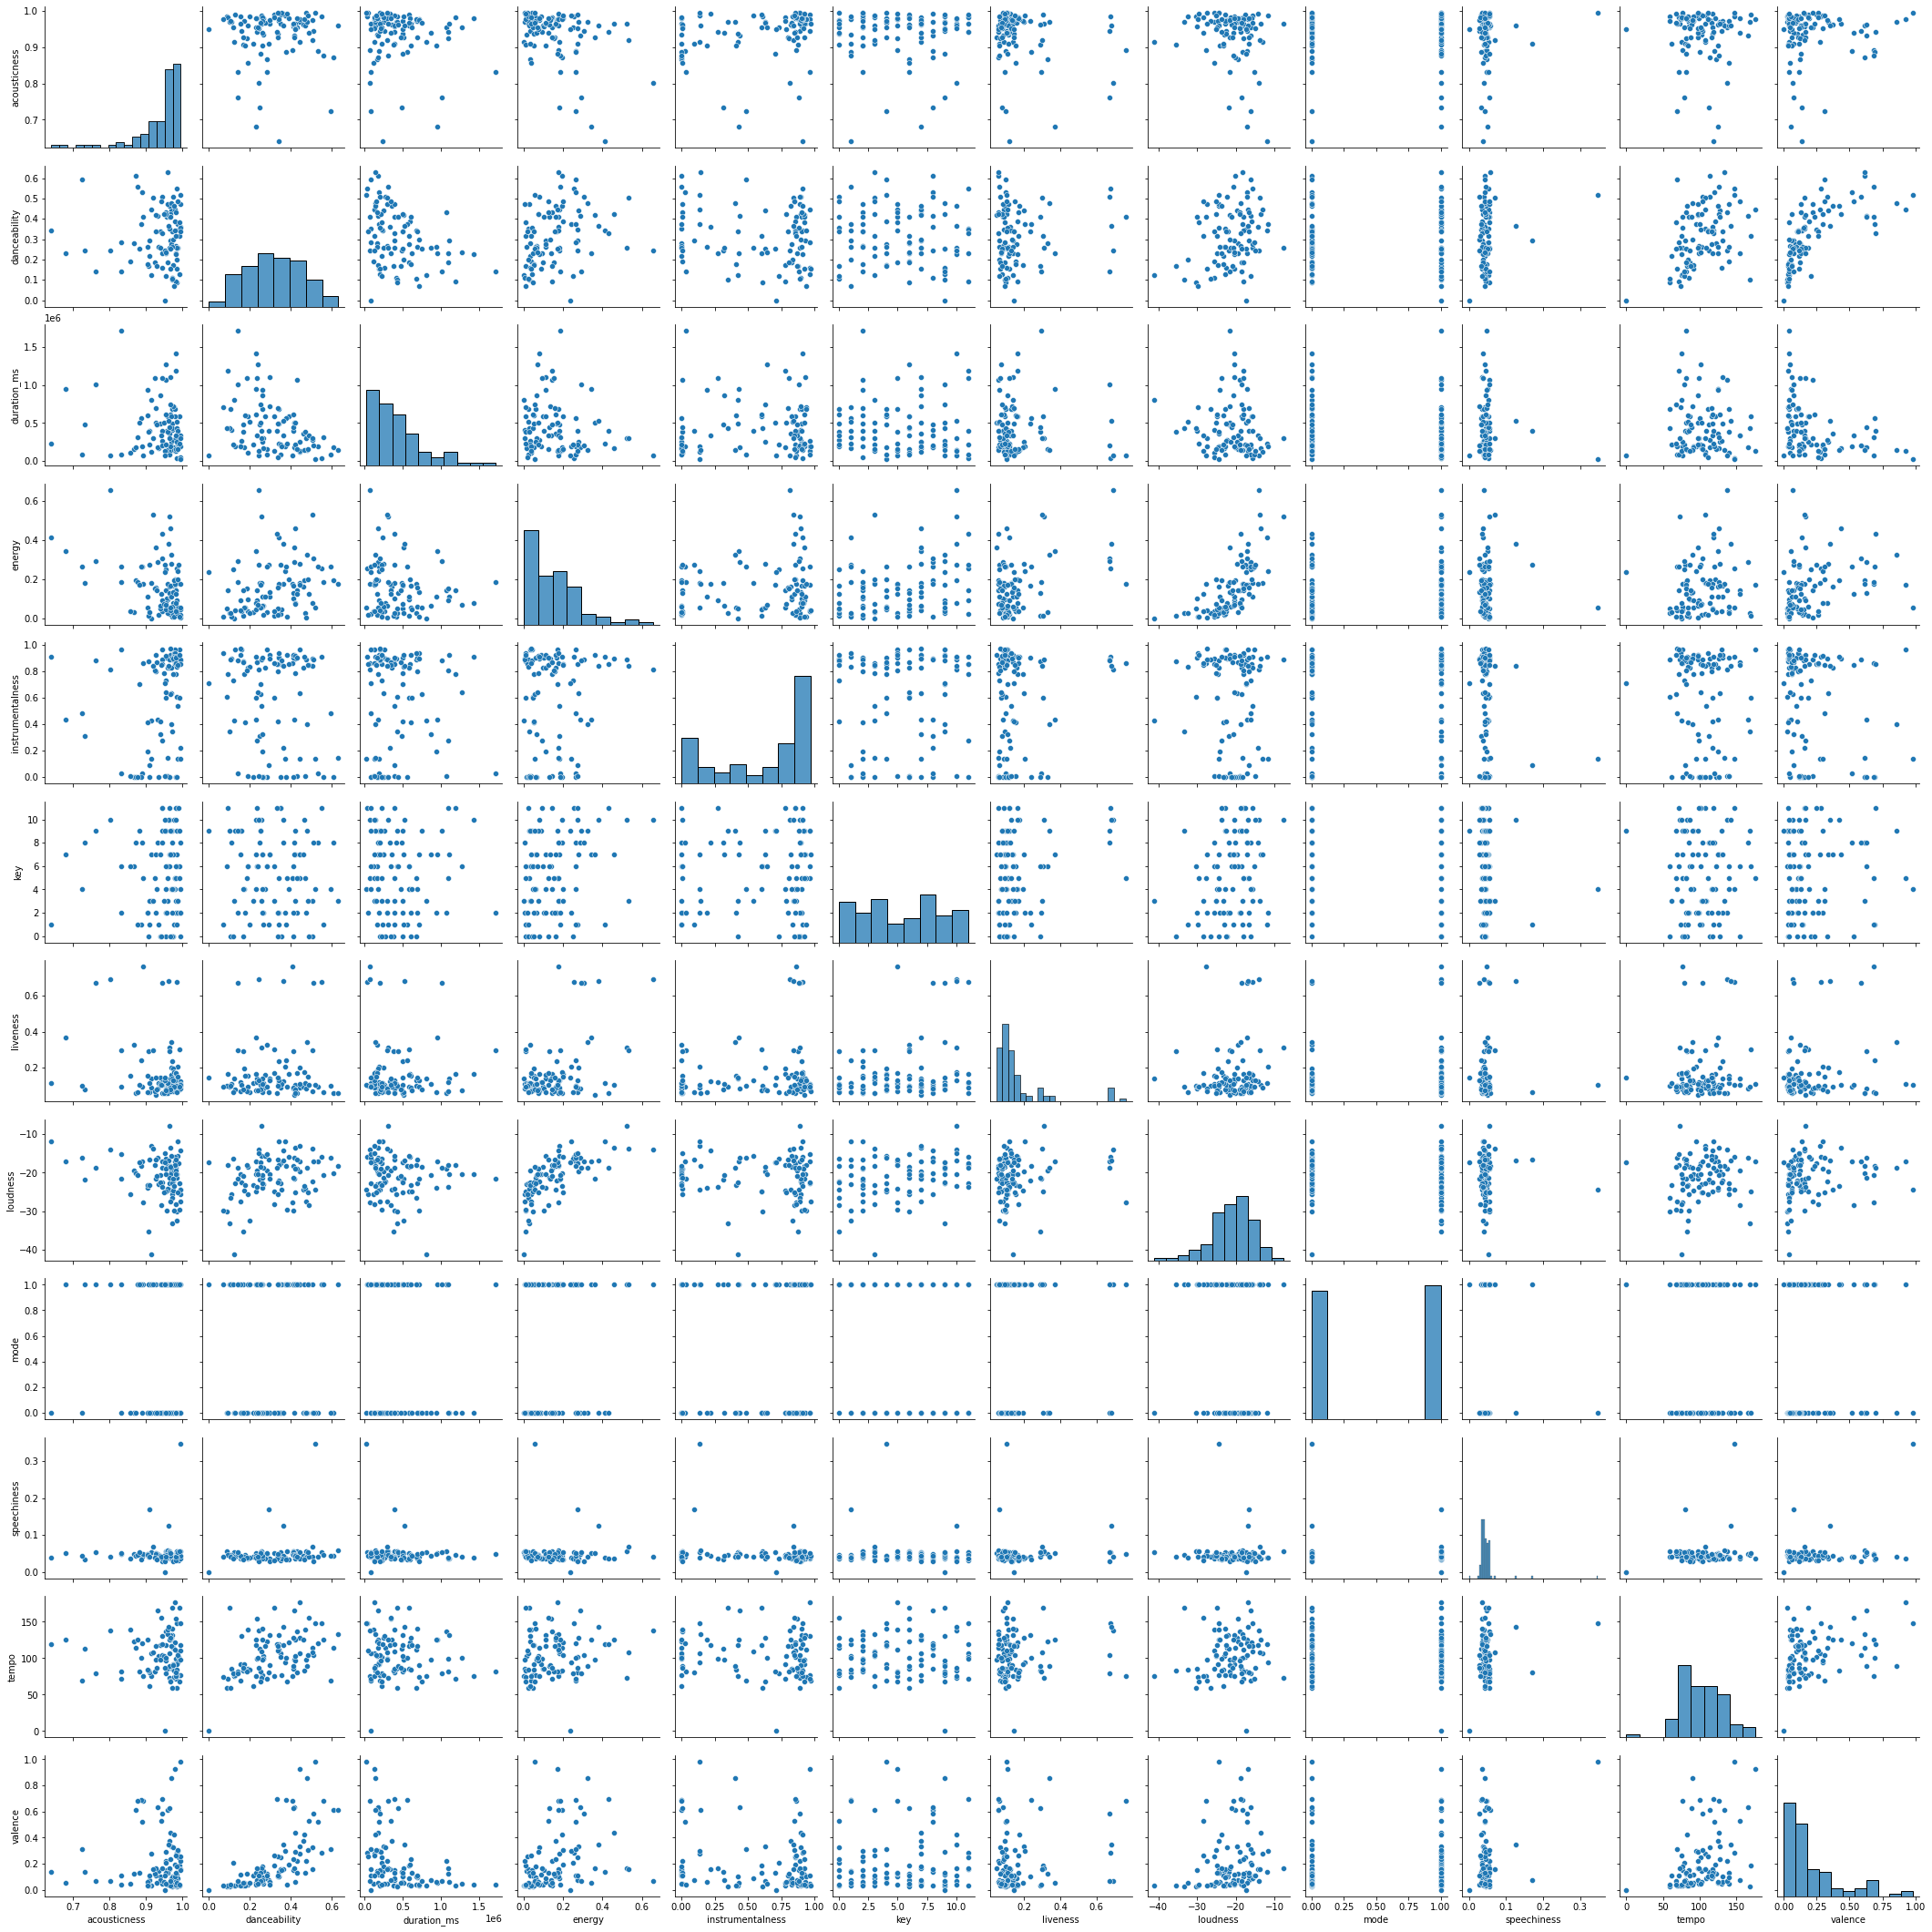

In [79]:
sns.pairplot(playlist_df)
plt.show()

we can see that a good number of variables are somewhat linearly releated, even if the datapoints are quite sparse

In [ ]:
# from yellowbrick.target import FeatureCorrelation

# feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
#        'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year'] 
#         #type float and int, without object type

# X, y = data[feature_names], data['popularity']

# features = np.array(feature_names)

# visualizer = FeatureCorrelation(labels=features)

# plt.rcParams['figure.figsize']=(10,10)
# visualizer.fit(X, y)     
# visualizer.show()

Najbardziej podobne utwory 

In [135]:
import scipy

In [136]:
distances = scipy.spatial.distance.cdist(f64, f64, metric='euclidean')

In [137]:
distances.shape

(98, 98)

<AxesSubplot:>

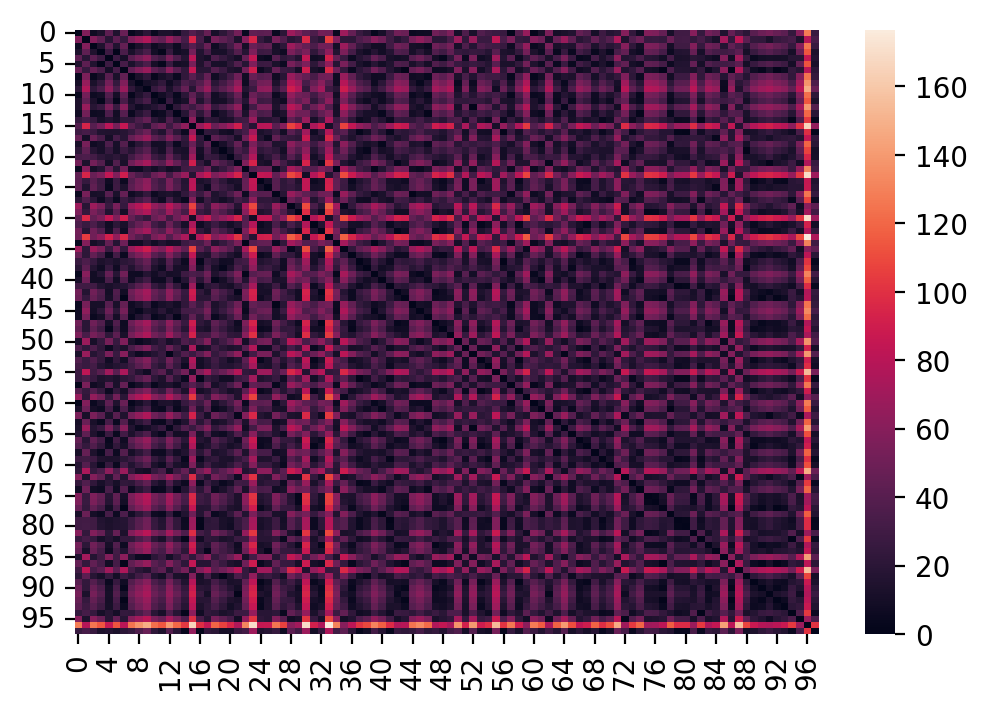

In [138]:
plt.figure(dpi=200)
sns.heatmap(distances)

In [142]:
f64[distances==distances.max()][['acousticness','danceability', 'energy', 'instrumentalness','liveness','loudness',
                                 'speechiness','tempo','valence']]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
3 Utwory w dawnym stylu (3 Pieces in Old Style): II. —,0.978,0.444,0.170,0.966,0.110,-16.992,0.0356,176.4,0.926
"Prince Igor: Polovtsian Dances (Remastered): No. 17e, Moderato alla breve",0.951,0.000,0.235,0.712,0.143,-17.369,0.0000,0.0,0.000
